## Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
from pandas_gbq import read_gbq
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import auth
auth.authenticate_user()
project_id = "prello-project-434904"

## Queries

In [ ]:
query_all = """
  SELECT *
  FROM `prello-project-434904.prello.score_all`
"""

In [ ]:
query_house = """
  SELECT *
  FROM `prello-project-434904.prello.ranking_houses`
"""

In [ ]:
query_apartment = """
  SELECT *
  FROM `prello-project-434904.prello.ponderation_apartment`
"""

## all

In [ ]:
df_all = read_gbq(query_all,project_id)
df_all.head()

Downloading: 100%|██████████|


,municipality_code,growth_population,salary_rent_ratio,price_volatility,real_estate_tension,touristic_attractiveness_index,housing_demand_index,high_investor,moderate_investor,low_investor,type
0,94041,0.60,0.08,0.35,0.13,0.27,0.52,0.37,0.36,0.35,all
1,31555,0.81,0.75,0.43,0.13,1.00,0.37,0.58,0.60,0.64,all
2,38185,0.49,0.81,0.98,0.22,0.72,0.23,0.60,0.57,0.58,all
3,33063,0.86,0.38,0.47,0.30,0.94,0.55,0.61,0.59,0.60,all
4,33281,0.99,0.30,0.31,0.22,0.53,0.46,0.50,0.52,0.55,all


In [ ]:
X = df_all[['growth_population',
            'salary_rent_ratio',
            'price_volatility',
            'real_estate_tension',
            'touristic_attractiveness_index',
            'housing_demand_index']]

y = df_all[['high_investor']]
y2 = df_all[['moderate_investor']]
y3 = df_all[['low_investor']]

**all high**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.8,
                                                    random_state=0)

In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)

In [ ]:
# Entrenamiento con y = high
rf_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.001608868235294112
----------------------------------------------------------------------


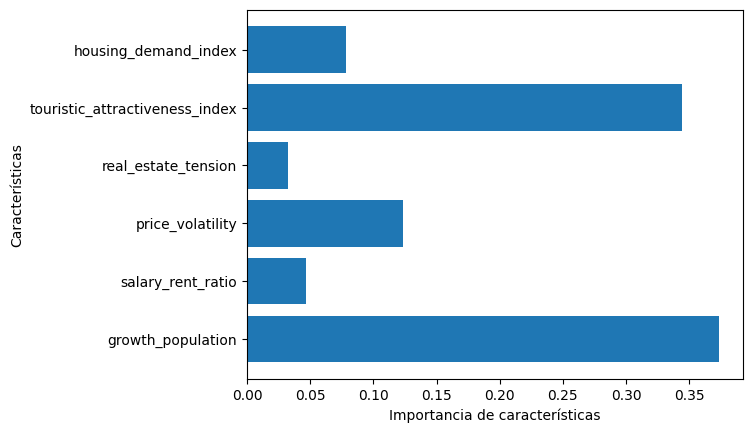

In [ ]:
# Hacer predicciones
Y_pred = rf_regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, Y_pred)
print('-'*70)
print(f"Error cuadrático medio: {mse}")
print('-'*70)

# Visualizar la importancia de las características
importances = rf_regressor.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

**all moderate**

In [ ]:
# Particion de los datos con y2 = moderate_investor
X_train, X_test, y2_train, y2_test = train_test_split(X,y2,
                                                      train_size=0.8,
                                                      random_state=0)

In [ ]:
# Entrenamiento y = moderate
rf_regressor.fit(X_train, y2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.0013336729411764742
----------------------------------------------------------------------


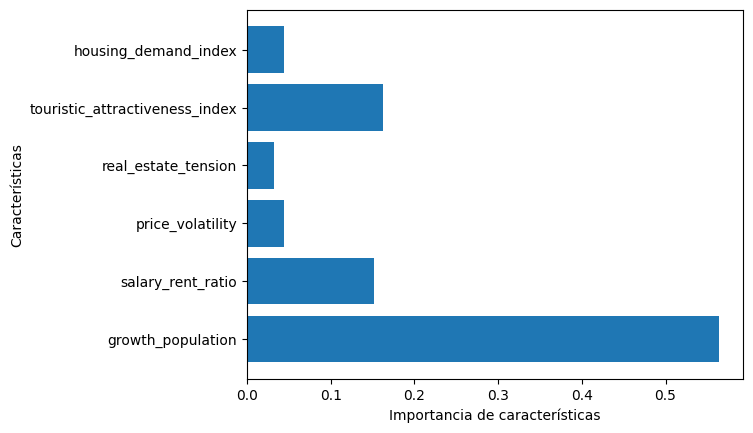

In [ ]:
# Hacer predicciones
Y2_pred = rf_regressor.predict(X_test)

# Evaluar el modelo
mse2 = mean_squared_error(y2_test, Y2_pred)
print('-'*70)
print(f"Error cuadrático medio: {mse2}")
print('-'*70)


# Visualizar la importancia de las características
importances2 = rf_regressor.feature_importances_
plt.barh(X.columns, importances2)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

**all low**

In [ ]:
X_train, X_test, y3_train, y3_test = train_test_split(X,y3,
                                                      train_size=0.8,
                                                      random_state=0)

In [ ]:
# Entrenamiento y = low
rf_regressor.fit(X_train, y3_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.00132406647058825
----------------------------------------------------------------------


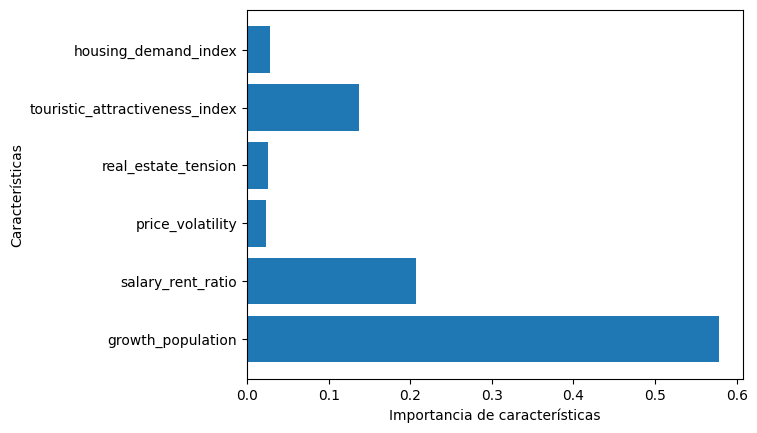

In [ ]:
# Hacer predicciones
Y3_pred = rf_regressor.predict(X_test)

# Evaluar el modelo
mse3 = mean_squared_error(y3_test, Y3_pred)
print('-'*70)
print(f"Error cuadrático medio: {mse3}")
print('-'*70)


# Visualizar la importancia de las características
importances3 = rf_regressor.feature_importances_
plt.barh(X.columns, importances3)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

In [ ]:
list_importences =  np.array([importances,importances2,importances3]).T
importances_df = pd.DataFrame(list_importences,
                              columns=['high','moderate','low'],
                              index= ['Growth population',
                                    'Salary rent ratio',
                                    'Pricevolatility',
                                    'Real estate tension',
                                    'Touristic attractiveness index',
                                    'Housing demand index'])
importances_df['type'] = 'all'
importances_df

,high,moderate,low,type
Growth population,0.373926,0.564350,0.578796,all
Salary rent ratio,0.046795,0.152238,0.206677,all
Pricevolatility,0.123637,0.043755,0.023179,all
Real estate tension,0.032828,0.032230,0.025613,all
Touristic attractiveness index,0.344103,0.162983,0.137714,all
Housing demand index,0.078710,0.044445,0.028021,all


## house

In [ ]:
df_house = read_gbq(query_house,project_id)
df_house.head()

Downloading: 100%|██████████|


,municipality_code,growth_population,salary_rent_ratio,price_volatility,real_estate_tension,touristic_attractiveness_index,housing_demand_index,high_investor,moderate_investor,low_investor,type
0,94041,0.60,0.20,0.80,0.13,0.27,0.50,0.49,0.45,0.42,house
1,31555,0.81,0.62,0.13,0.13,1.00,0.36,0.49,0.53,0.58,house
2,38185,0.49,0.64,0.38,0.22,0.72,0.30,0.45,0.46,0.49,house
3,33063,0.86,0.42,0.20,0.30,0.94,0.46,0.53,0.55,0.58,house
4,33281,0.99,0.45,0.20,0.22,0.53,0.38,0.47,0.52,0.56,house


In [ ]:
X_h = df_house[['growth_population',
            'salary_rent_ratio',
            'price_volatility',
            'real_estate_tension',
            'touristic_attractiveness_index',
            'housing_demand_index']]

yh = df_house[['high_investor']]
yh2 = df_house[['moderate_investor']]
yh3 = df_house[['low_investor']]

In [ ]:
# particion de datos con yh = high_investor
X_h_train, X_h_test, yh_train, yh_test = train_test_split(X_h,
                                                          yh,
                                                          train_size=0.8,
                                                          random_state=0)

**house high**

In [ ]:
rf_regressor_h = RandomForestRegressor(random_state=42)

In [ ]:
# Entrenamiento y = high
rf_regressor_h.fit(X_h_train, yh_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.0017208341176470567
----------------------------------------------------------------------


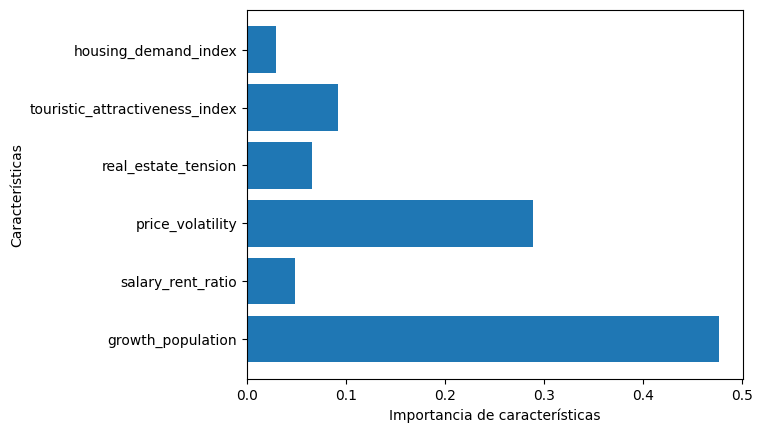

In [ ]:
# Hacer predicciones
Yh_pred = rf_regressor_h.predict(X_h_test)

# Evaluar el modelo
mseh = mean_squared_error(yh_test, Yh_pred)
print('-'*70)
print(f"Error cuadrático medio: {mseh}")
print('-'*70)


# Visualizar la importancia de las características
importances_h = rf_regressor_h.feature_importances_
plt.barh(X_h.columns, importances_h)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

**house moderate**

In [ ]:
# particion de datos con yh2 = moderate_investor
X_h_train, X_h_test, yh2_train, yh2_test = train_test_split(X_h,
                                                          yh2,
                                                          train_size=0.8,
                                                          random_state=0)

In [ ]:
# Entrenamiento y = moderate
rf_regressor_h.fit(X_h_train, yh2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.002187854705882358
----------------------------------------------------------------------


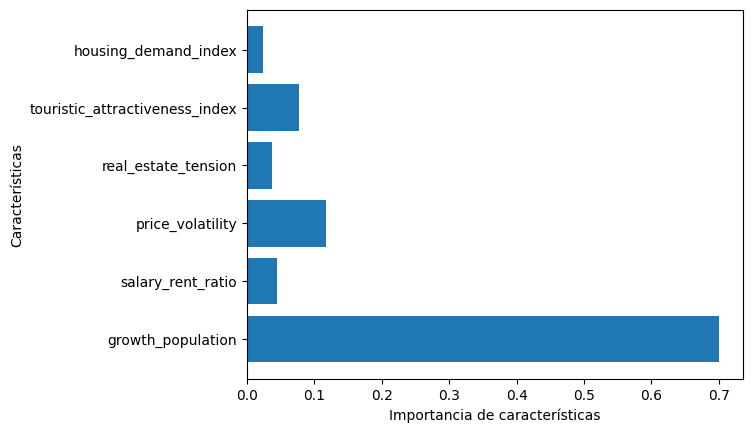

In [ ]:
# Hacer predicciones
Yh2_pred = rf_regressor_h.predict(X_h_test)

# Evaluar el modelo
mseh2 = mean_squared_error(yh2_test, Yh2_pred)
print('-'*70)
print(f"Error cuadrático medio: {mseh2}")
print('-'*70)

# Visualizar la importancia de las características
importances_h2 = rf_regressor_h.feature_importances_
plt.barh(X_h.columns, importances_h2)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

**house low**

In [ ]:
# particion de datos con yh3 = low_investor
X_h_train, X_h_test, yh3_train, yh3_test = train_test_split(X_h,
                                                          yh3,
                                                          train_size=0.8,
                                                          random_state=0)

In [ ]:
# Entrenamiento y = low
rf_regressor_h.fit(X_h_train, yh3_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.0021329017647058936
----------------------------------------------------------------------


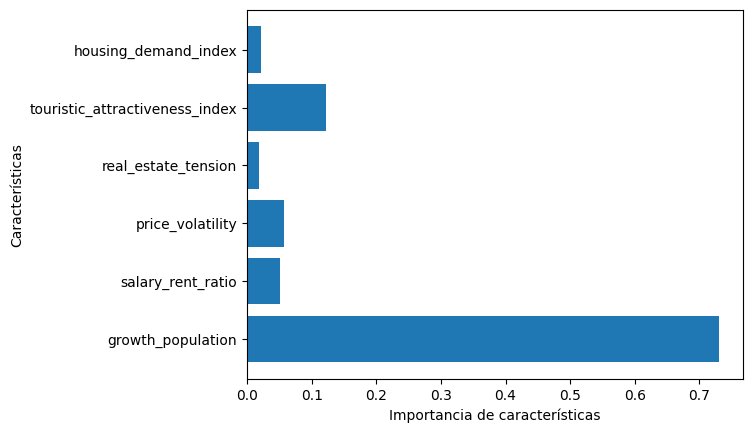

In [ ]:
# Hacer predicciones
Yh3_pred = rf_regressor_h.predict(X_h_test)

# Evaluar el modelo
mseh3 = mean_squared_error(yh3_test, Yh3_pred)
print('-'*70)
print(f"Error cuadrático medio: {mseh3}")
print('-'*70)

# Visualizar la importancia de las características
importances_h3 = rf_regressor_h.feature_importances_
plt.barh(X_h.columns, importances_h3)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

In [ ]:
list_importences_h =  np.array([importances_h,importances_h2,importances_h3]).T
importances_h_df = pd.DataFrame(list_importences_h,
                                columns=['high','moderate','low'],
                                index=['Growth population',
                                      'Salary rent ratio',
                                      'Pricevolatility',
                                      'Real estate tension',
                                      'Touristic attractiveness index',
                                      'Housing demand index'])
importances_h_df['type'] = 'house'
importances_h_df

,high,moderate,low,type
Growth population,0.476933,0.700828,0.731033,house
Salary rent ratio,0.048112,0.044053,0.050561,house
Pricevolatility,0.289140,0.116909,0.056465,house
Real estate tension,0.065495,0.037277,0.018064,house
Touristic attractiveness index,0.091371,0.076577,0.121906,house
Housing demand index,0.028949,0.024356,0.021971,house


## apartment

In [ ]:
df_apartment = read_gbq(query_apartment,project_id)
df_apartment.head()

Downloading: 100%|██████████|


,municipality_code,growth_population,salary_rent_ratio,price_volatility,real_estate_tension,touristic_attractiveness_index,housing_demand_index,high_investor,moderate_investor,low_investor,type
0,94041,0.60,0.05,0.29,0.13,0.27,0.53,0.36,0.35,0.34,apartment
1,31555,0.81,0.37,0.44,0.13,1.00,0.35,0.54,0.53,0.55,apartment
2,38185,0.49,0.27,0.75,0.22,0.72,0.25,0.49,0.44,0.42,apartment
3,33063,0.86,0.27,0.52,0.30,0.94,0.52,0.60,0.57,0.58,apartment
4,33281,0.99,0.16,0.40,0.22,0.53,0.37,0.49,0.49,0.51,apartment


In [ ]:
X_a = df_apartment[['growth_population',
            'salary_rent_ratio',
            'price_volatility',
            'real_estate_tension',
            'touristic_attractiveness_index',
            'housing_demand_index']]

ya = df_apartment[['high_investor']]
ya2 = df_apartment[['moderate_investor']]
ya3 = df_apartment[['low_investor']]

**apartment high**

In [ ]:
X_a_train, X_a_test, ya_train, ya_test = train_test_split(X_a,
                                                          ya,
                                                          train_size=0.8,
                                                          random_state=0)

In [ ]:
rf_regressor_a = RandomForestRegressor(random_state=42)

In [ ]:
# Entrenamiento y = high
rf_regressor_a.fit(X_a_train, ya_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.0006047705882352905
----------------------------------------------------------------------


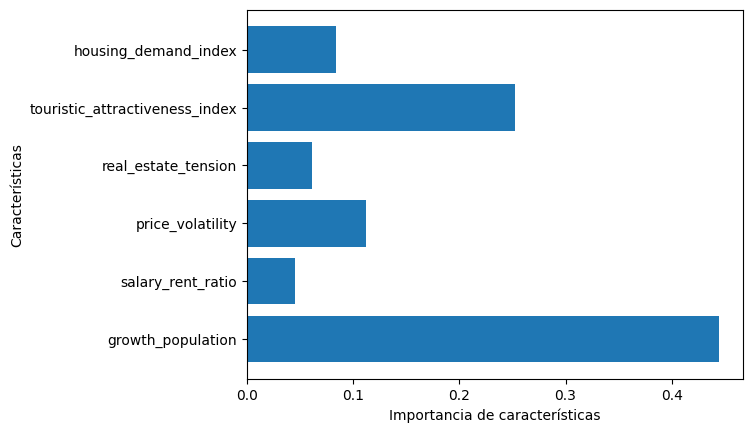

In [ ]:
# Hacer predicciones
Ya_pred = rf_regressor_a.predict(X_a_test)

# Evaluar el modelo
msea = mean_squared_error(ya_test, Ya_pred)
print('-'*70)
print(f"Error cuadrático medio: {msea}")
print('-'*70)

# Visualizar la importancia de las características
importances_a = rf_regressor_a.feature_importances_
plt.barh(X_a.columns, importances_a)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

**apartment moderate**

In [ ]:
X_a_train, X_a_test, ya2_train, ya2_test = train_test_split(X_a,
                                                          ya2,
                                                          train_size=0.8,
                                                          random_state=0)

In [ ]:
# Entrenamiento y= moderate
rf_regressor_a.fit(X_a_train, ya2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.0010618500000000035
----------------------------------------------------------------------


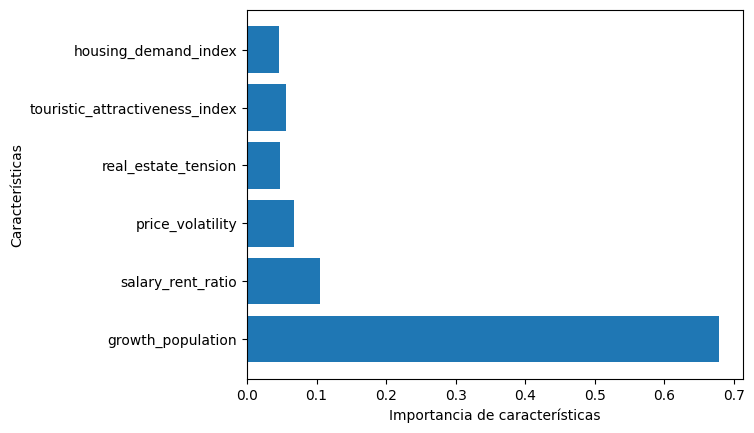

In [ ]:
# Hacer predicciones
Ya2_pred = rf_regressor_a.predict(X_a_test)

# Evaluar el modelo
msea2 = mean_squared_error(ya2_test, Ya2_pred)
print('-'*70)
print(f"Error cuadrático medio: {msea2}")
print('-'*70)

# Visualizar la importancia de las características
importances_a2 = rf_regressor_a.feature_importances_
plt.barh(X_a.columns, importances_a2)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

**apartment low**

In [ ]:
X_a_train, X_a_test, ya3_train, ya3_test = train_test_split(X_a,
                                                          ya3,
                                                          train_size=0.8,
                                                          random_state=0)

In [ ]:
# Entrenamiento y = low
rf_regressor_a.fit(X_a_train, ya3_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

----------------------------------------------------------------------
Error cuadrático medio: 0.0012838552941176395
----------------------------------------------------------------------


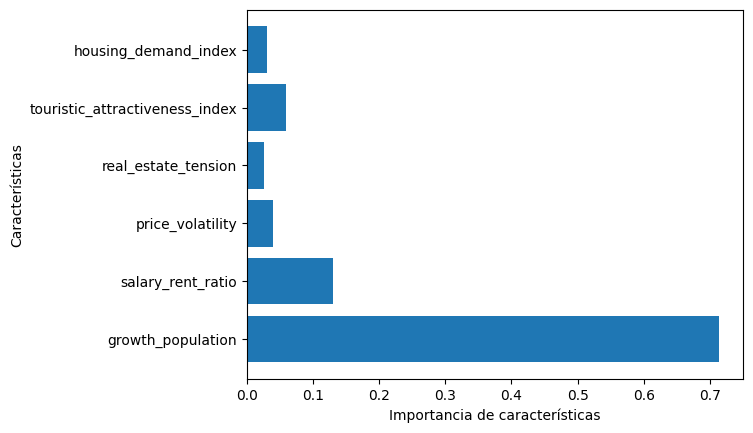

In [ ]:
# Hacer predicciones
Ya3_pred = rf_regressor_a.predict(X_a_test)

# Evaluar el modelo
msea3 = mean_squared_error(ya3_test, Ya3_pred)
print('-'*70)
print(f"Error cuadrático medio: {msea3}")
print('-'*70)

# Visualizar la importancia de las características
importances_a3 = rf_regressor_a.feature_importances_
plt.barh(X_a.columns, importances_a3)
plt.xlabel("Importancia de características")
plt.ylabel("Características")
plt.show()

In [ ]:
list_importences_a =  np.array([importances_a,importances_a2,importances_a3]).T
importences_a_df = pd.DataFrame(list_importences_a,
                                columns=['high','moderate','low'],
                                index=['Growth population',
                                      'Salary rent ratio',
                                      'Pricevolatility',
                                      'Real estate tension',
                                      'Touristic attractiveness index',
                                      'Housing demand index'])
importences_a_df['type'] = 'apartment'
importences_a_df

,high,moderate,low,type
Growth population,0.444936,0.679359,0.714489,apartment
Salary rent ratio,0.044904,0.105351,0.130384,apartment
Pricevolatility,0.111698,0.067018,0.039674,apartment
Real estate tension,0.061534,0.046987,0.026334,apartment
Touristic attractiveness index,0.252779,0.056002,0.059556,apartment
Housing demand index,0.084148,0.045283,0.029564,apartment


In [ ]:
df = pd.concat([importances_df,importances_h_df, importences_a_df], axis=0).reset_index()
df.columns = ['variable','high','moderate','low','type']
df

,variable,high,moderate,low,type
0,Growth population,0.373926,0.564350,0.578796,all
1,Salary rent ratio,0.046795,0.152238,0.206677,all
2,Pricevolatility,0.123637,0.043755,0.023179,all
3,Real estate tension,0.032828,0.032230,0.025613,all
4,Touristic attractiveness index,0.344103,0.162983,0.137714,all
5,Housing demand index,0.078710,0.044445,0.028021,all
6,Growth population,0.476933,0.700828,0.731033,house
7,Salary rent ratio,0.048112,0.044053,0.050561,house
8,Pricevolatility,0.289140,0.116909,0.056465,house
9,Real estate tension,0.065495,0.037277,0.018064,house


In [ ]:
df.to_csv('importences_rf.csv', index=False)